In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
def sin_taylor(x, tolerance, max_terms=1000):

    sin_approx = 0
    approximations = []
    for n in range(max_terms):
        term = ((-1)**n)*(x**(2*n+1)) / math.factorial(2*n+1)
        sin_approx += term
        approximations.append(sin_approx)
        # Verificar convergencia
        if abs(term) < tolerance:
            return sin_approx, n + 1, approximations  # n+1 porque empezamos en n=0

    return sin_approx, max_terms

In [2]:
x_float64 = np.float64(np.pi/4)  # Mismo valor, pero en float64
epsilon_float64 = np.finfo(np.float64).eps  # Épsilon de la máquina para float64 (~2.22e-16)

sin_exact = math.sin(x_float64)
sin_approx_float64, n_terms_float64, approximations = sin_taylor(x_float64, epsilon_float64)

error_abs_float64 = abs(sin_approx_float64 - sin_exact)
error_rel_float64 = error_abs_float64 / abs(sin_exact) * 100

print(f"\nPara float64 (x = {x_float64}):")
print(f"- Términos necesarios: {n_terms_float64}")
print(f"- Error absoluto: {error_abs_float64:.3e}")
print(f"- Error relativo: {error_rel_float64:.3e}%")


Para float64 (x = 0.7853981633974483):
- Términos necesarios: 9
- Error absoluto: 0.000e+00
- Error relativo: 0.000e+00%


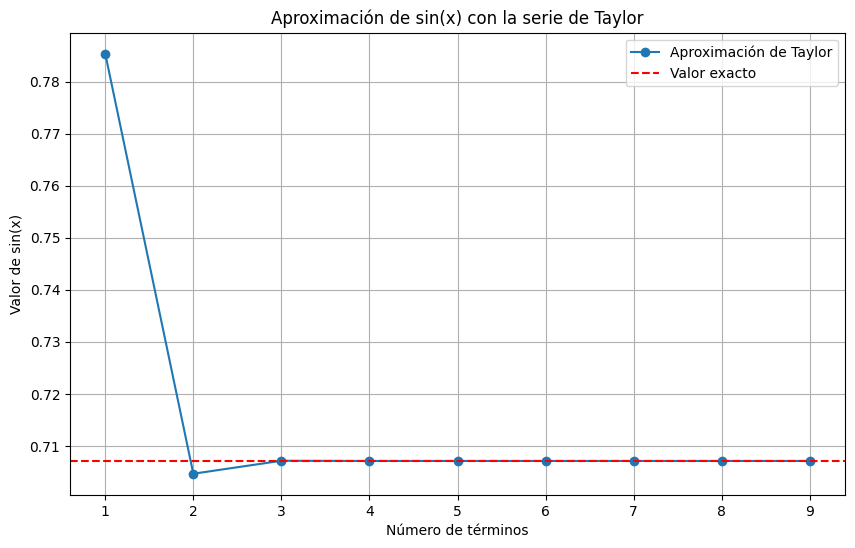

In [3]:
# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(approximations) + 1), approximations, marker='o', linestyle='-', label='Aproximación de Taylor')
plt.axhline(y=sin_exact, color='r', linestyle='--', label='Valor exacto')
plt.xlabel('Número de términos')
plt.ylabel('Valor de sin(x)')
plt.title('Aproximación de sin(x) con la serie de Taylor')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
def ln_taylor(x, tolerance, max_terms=1000):
    if not abs(x) < 1:
        raise ValueError("La serie de Taylor para ln(x+1) solo converge si |x| < 1")
    ln_approx = 0
    approximations2 = []
    for n in range(1,max_terms+1):
        term = ((-1)**(n-1))*(x**(n)) / n
        ln_approx += term
        approximations2.append(ln_approx)
        # Verificar convergencia
        if abs(term) < tolerance:
          return ln_approx, n, approximations2
    return ln_approx, n + 1, approximations2  # n+1 porque empezamos en n=0

    return ln_approx, max_terms

In [5]:
x = np.pi / 4
tolerance = 1e-6
ln_approx, n_terms, approximations2 = ln_taylor(x, tolerance)
print(f"Aproximación de ln({x}+1): {ln_approx}")
print(f"Número de términos utilizados: {n_terms}")


x_float64 = np.float64(np.pi/4)  # Mismo valor, pero en float64
epsilon_float64 = np.finfo(np.float64).eps  # Épsilon de la máquina para float64 (~2.22e-16)

ln_exact = math.log(x_float64 + 1)
ln_approx_float64, n_terms_float64, approximations2 = ln_taylor(x_float64, epsilon_float64)

error_abs_float64 = abs(ln_approx_float64 - ln_exact)
error_rel_float64 = error_abs_float64 / abs(ln_exact) * 100

print(f"\nPara float64 (x = {x_float64}):")
print(f"- Términos necesarios: {n_terms_float64}")
print(f"- Error absoluto: {error_abs_float64:.3e}")
print(f"- Error relativo: {error_rel_float64:.3e}%")

Aproximación de ln(0.7853981633974483+1): 0.5796410455117946
Número de términos utilizados: 42

Para float64 (x = 0.7853981633974483):
- Términos necesarios: 130
- Error absoluto: 5.551e-16
- Error relativo: 9.577e-14%


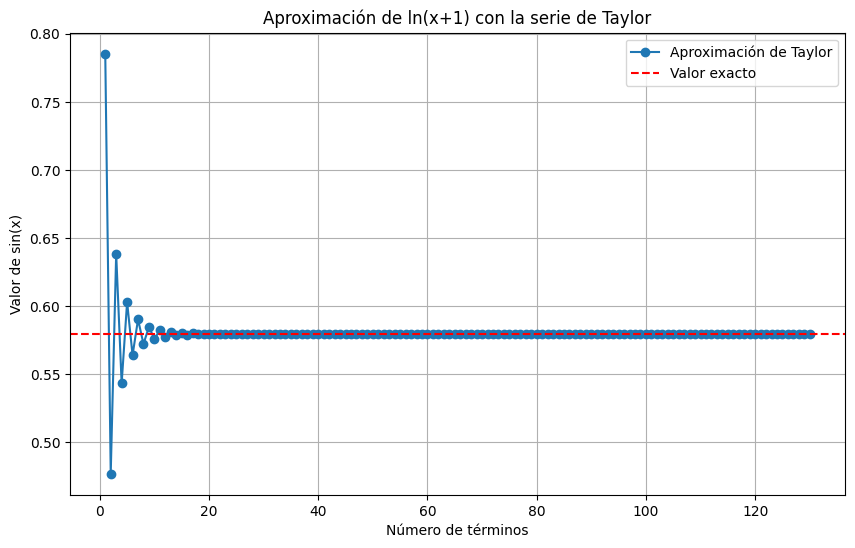

In [6]:
# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(approximations2) + 1), approximations2, marker='o', linestyle='-', label='Aproximación de Taylor')
plt.axhline(y=ln_exact, color='r', linestyle='--', label='Valor exacto')
plt.xlabel('Número de términos')
plt.ylabel('Valor de sin(x)')
plt.title('Aproximación de ln(x+1) con la serie de Taylor')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from scipy.special import comb

def coef_binomial_scipy(α, n):
    return comb(α, n, exact=False)

def sqrt_taylor(x, n_terms):
    aproximacion = 0
    for n in range(n_terms):
        aproximacion += coef_binomial_scipy(0.5, n) * (x**n)
    return aproximacion

Valor real de sqrt(1 + 0.5): 1.224744871391589
Aproximación con 1 términos: 1.0
Aproximación con 2 términos: 1.0
Aproximación con 3 términos: 1.0
Aproximación con 4 términos: 1.0
Aproximación con 5 términos: 1.0
Aproximación con 6 términos: 1.0
Aproximación con 7 términos: 1.0
Aproximación con 8 términos: 1.0
Aproximación con 9 términos: 1.0
Aproximación con 10 términos: 1.0
Error relativo con 1 términos: 0.183503, Error porcentual: 18.35%
Error relativo con 2 términos: 0.183503, Error porcentual: 18.35%
Error relativo con 3 términos: 0.183503, Error porcentual: 18.35%
Error relativo con 4 términos: 0.183503, Error porcentual: 18.35%
Error relativo con 5 términos: 0.183503, Error porcentual: 18.35%
Error relativo con 6 términos: 0.183503, Error porcentual: 18.35%
Error relativo con 7 términos: 0.183503, Error porcentual: 18.35%
Error relativo con 8 términos: 0.183503, Error porcentual: 18.35%
Error relativo con 9 términos: 0.183503, Error porcentual: 18.35%
Error relativo con 10 términ

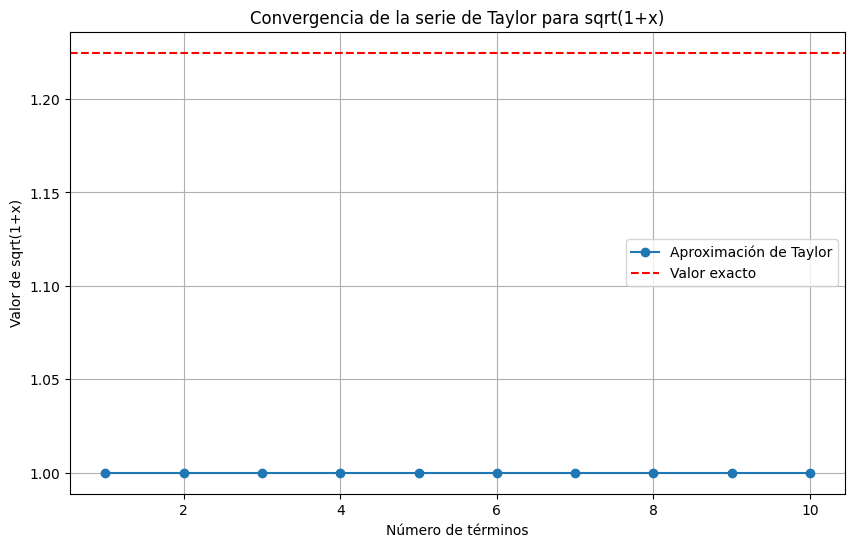

Para una tolerancia de 0.1, se necesitan 0 terminos.
Para una tolerancia de 0.01, se necesitan 0 terminos.
Para una tolerancia de 0.001, se necesitan 0 terminos.
Para una tolerancia de 0.0001, se necesitan 0 terminos.
Para una tolerancia de 1e-05, se necesitan 0 terminos.
Para una tolerancia de 1e-06, se necesitan 0 terminos.
Para una tolerancia de 1e-07, se necesitan 0 terminos.


In [9]:
# a. Aproximación para x = 0.5
x = 0.5
valorreal = math.sqrt(1 + x)
print(f"Valor real de sqrt(1 + {x}): {valorreal}")

for n_terms in range(1, 11):
    aproximacion= sqrt_taylor(x, n_terms)
    print(f"Aproximación con {n_terms} términos: {aproximacion}")

# b. Error relativo y porcentual
for n_terms in range(1, 11):
    aproximacion = sqrt_taylor(x, n_terms)
    error_relativo = abs((valorreal - aproximacion) / valorreal)
    error_porcentual = error_relativo * 100
    print(f"Error relativo con {n_terms} términos: {error_relativo:.6f}, Error porcentual: {error_porcentual:.2f}%")

# c. Gráfico de la convergencia
aproximaciones = [sqrt_taylor(x, n) for n in range(1, 11)]
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), aproximaciones, marker='o', linestyle='-', label='Aproximación de Taylor')
plt.axhline(y=valorreal, color='r', linestyle='--', label='Valor exacto')
plt.xlabel('Número de términos')
plt.ylabel('Valor de sqrt(1+x)')
plt.title('Convergencia de la serie de Taylor para sqrt(1+x)')
plt.legend()
plt.grid(True)
plt.show()

# d. Criterio de tolerancia
tolerancias = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
for tolerancia in tolerancias:
    n_terminos = 0
    aproximacion = 0
    for n in range(1, 50):
        aproximacion = sqrt_taylor(x, n)
        error = abs(valorreal - aproximacion)
        if error < tolerancia:
            n_terminos = n
            break
    print(f"Para una tolerancia de {tolerancia}, se necesitan {n_terminos} terminos.")